<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 11 **
** ┗ Coca -Cola stock price prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Find out the stock price」
* 🥈SESSION 2 -「Understanding the stock price」
* 🥇Session 3 -「ML usage stock price prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/11_Coca-Cola Stock Price Forecasting')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/11_Coca-Cola Stock Price Forecasting'

## ** Looking at the problem situation and data **
---
> ** Scenario ** ⤴💸 (Analyst, Research Center)

``
Research Center A is conducting research on the rise and fall of stock prices.Data related to stock prices, such as market prices, high prices, low prices, and closing price, and dividends, dividends,
We will use additional information such as stock division to predict stock prices and descendants.

``


> ** Looking at the data **

* Coca -Cola stock price data
* Data specification ⬇

| Date | Open | High | Low | Close | Volumne | DIVIDENDS | Stock Splits |
| ----: | ---: | ----: |: ---: | ---: | ---: ---: ---: ----: |
| Date | Cigar | High price | Low price | Tonga | Transactions | Dividend | Split date |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter11_stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0
5,1962-01-09,0.048728,0.049867,0.048349,0.049614,960000,0.0,0.0
6,1962-01-10,0.049614,0.050563,0.049108,0.049867,1612800,0.0,0.0
7,1962-01-11,0.049867,0.050374,0.049614,0.050374,614400,0.0,0.0
8,1962-01-12,0.050374,0.050374,0.049488,0.049994,883200,0.0,0.0
9,1962-01-15,0.049867,0.049867,0.049361,0.049488,614400,0.0,0.0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Unidentified factor affecting stock prices rising and falling
``

> ** Expected effect **

``
▶ Factors of influence on stock prices rising and falling
``

> ** Solution **

``
▶ Rising, falling predictions and impact factors through stock price data modeling
▶ Session 1 🥉
-Trend stock data trend (trend)
▶ Session 2 🥈
-Discipline, date of dates, issues based on certain conditions such as stock price issues and trading volume issues, and search for fluctuations
▶ Session 3 🥇
-S share price rising/falling using ML algorithms
``

> ** Performance measurement **

``
▶ Further hit rate for predictive stock prices
``

> ** Public application **

``
▶ Expect to rise/decline after the stock price data input to the model at the end of the market
``

> ** Main code preview **

``
▶ Session 1 → TO_DATETIME, CandleStick2_ohlc
▶ Session 2 → np.where, value_counts (), shift ()
▶ Session 3 → Train_test_split, Classification_report, ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ ┗ Find the stock price trend **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 15,122 row, 8 cola
print('df', df.shape)

df (15122, 8)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15122 entries, 0 to 15121
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15122 non-null  object 
 1   Open          15122 non-null  float64
 2   High          15122 non-null  float64
 3   Low           15122 non-null  float64
 4   Close         15122 non-null  float64
 5   Volume        15122 non-null  int64  
 6   Dividends     15122 non-null  float64
 7   Stock Splits  15122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 945.3+ KB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
# ▶ Time data type change
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15122 entries, 0 to 15121
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15122 non-null  datetime64[ns]
 1   Open          15122 non-null  float64       
 2   High          15122 non-null  float64       
 3   Low           15122 non-null  float64       
 4   Close         15122 non-null  float64       
 5   Volume        15122 non-null  int64         
 6   Dividends     15122 non-null  float64       
 7   Stock Splits  15122 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 945.3 KB


### · stock price Trend Plotting
---


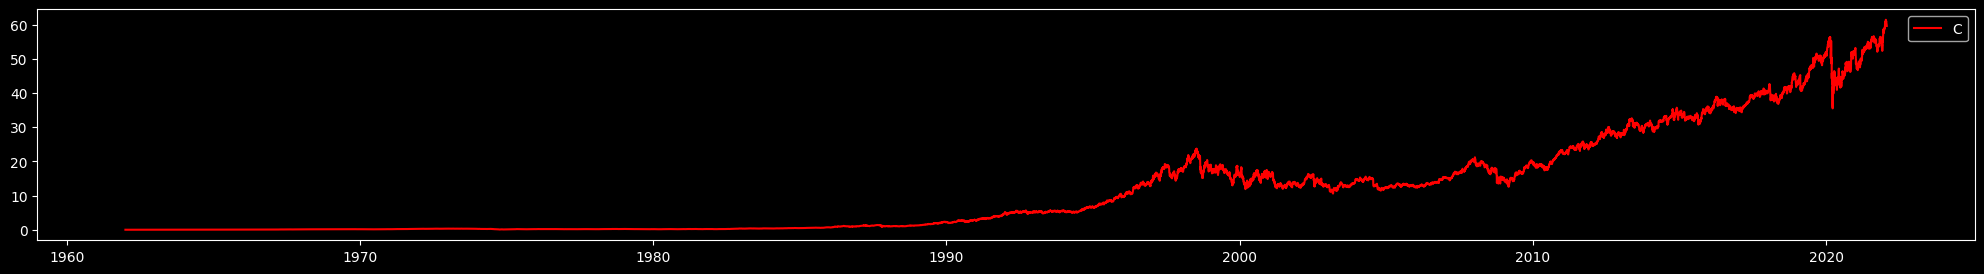

In [ ]:
# ▶ Check price confirmation
# ▶ Woo Sang -hyang graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date'], df['Close'], label='C', color='r');
plt.legend()
plt.gcf().set_size_inches(25, 3)

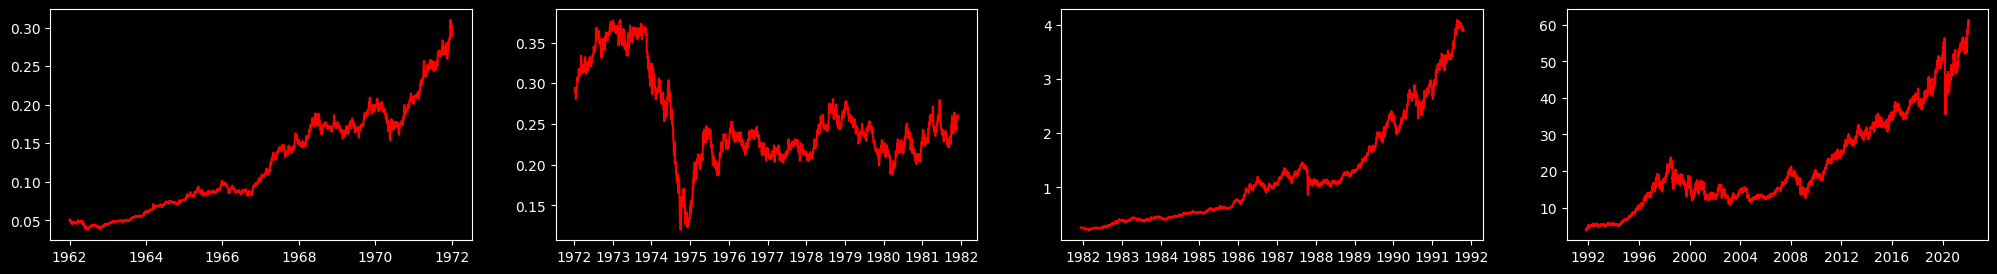

In [ ]:
# ▶ Check price confirmation
# ▶ Detailed share price for each period
plt.subplot(1,4,1)
plt.plot(df['Date'][0:2500], df['Close'][0:2500], label='C', color='r');

plt.subplot(1,4,2)
plt.plot(df['Date'][2501:5000], df['Close'][2501:5000], label='C', color='r');

plt.subplot(1,4,3)
plt.plot(df['Date'][5001:7500], df['Close'][5001:7500], label='C', color='r');

plt.subplot(1,4,4)
plt.plot(df['Date'][7501:], df['Close'][7501:], label='C', color='r');
plt.gcf().set_size_inches(25, 3)

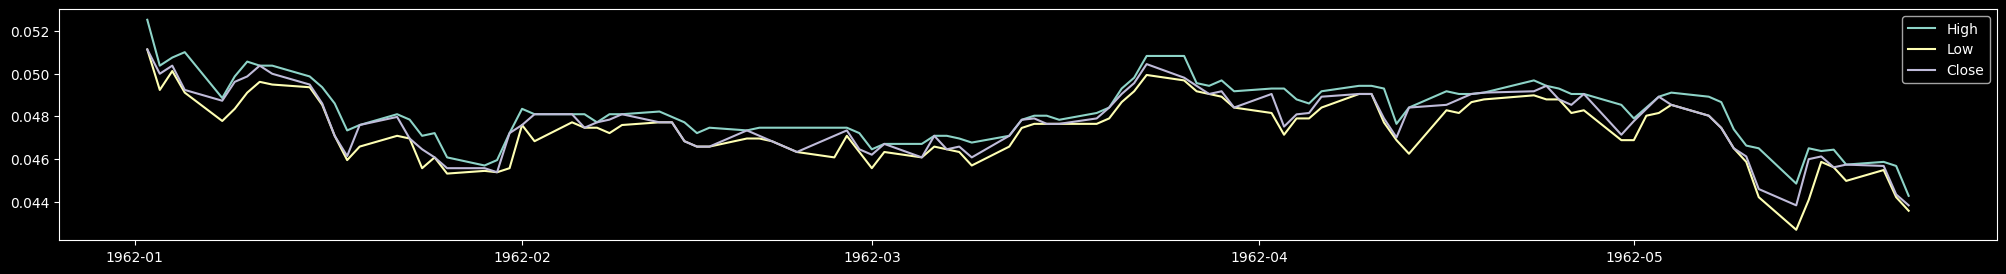

In [ ]:
# ▶ draw, Low, Close
plt.plot(df['Date'][0:100], df[['High', 'Low', 'Close']][0:100]);
plt.legend(['High', 'Low', 'Close'])
plt.gcf().set_size_inches(25, 3)

In [ ]:
# ▶ How to install package
!pip install mpl_finance

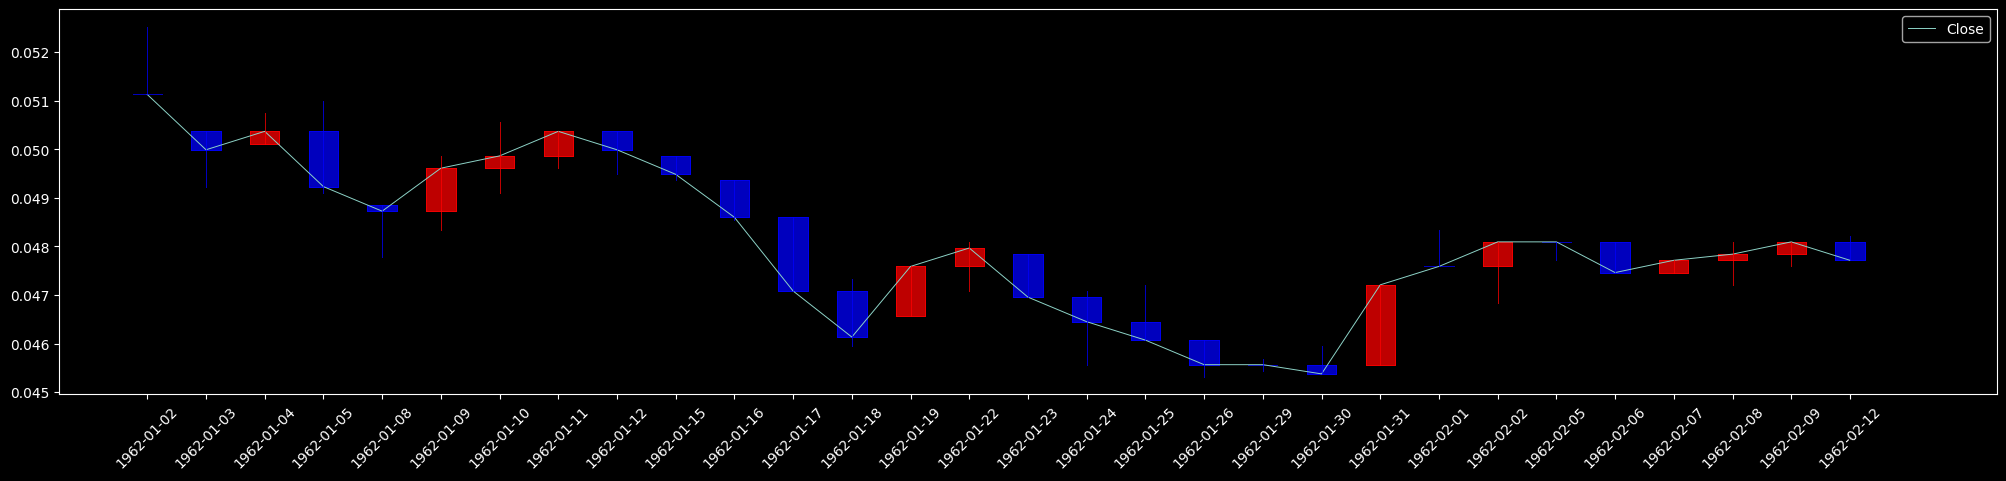

In [ ]:
# ▶ Expressing the stock price graph with candle sticks
from mpl_finance import candlestick2_ohlc

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

df_100 = df.iloc[0:30,:]
df_100 =df_100.set_index('Date')
index = df_100.index.astype('str')

ax.plot(index, df_100['Close'], label='Close', linewidth=0.7)

candlestick2_ohlc(ax, df_100['Open'], df_100['High'],
                  df_100['Low'], df_100['Close'],
                  width=0.5, colorup='r', colordown='b');
plt.xticks(rotation=45)
ax.legend()

## ** 🥈Session 2 **
** ┗ Identify the stock price issue **
---



### · Stock price issue definition
---
* The day when the trading volume occurs more than the average
* On the day of rising/falling compared to the previous trading day closing price


In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0


In [ ]:
# ▶ Based on an average of more than twice the trading volume
import numpy as np
df['Volume_issue']  = np.where(df['Volume'] > 2*df['Volume'].mean(), 1, 0)
df['Volume_issue'].value_counts()

,count
Volume_issue,
0,13490
1,1632


In [ ]:
1632/(13490+1632)

0.1079222325089274

In [ ]:
# ▶ LAG function to measure the rate of increase/drop rate
df['Close_lag'] = df['Close'].shift(1)
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,NaN
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234


In [ ]:
# ▶ NaN > 0
df = df.fillna(0.051133)
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234


In [ ]:
# ▶ Calculation rate/decline rate compared to the previous day
df['rate'] = ((df['Close'] - df['Close_lag']) / df['Close_lag'])*100
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374,-2.261532
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234,-1.028203


In [ ]:
# ▶ INF> 0, in the case of INF 0
df['rate'] = df['rate'].replace([np.inf, -np.inf], 0)
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374,-2.261532
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234,-1.028203


In [ ]:
# ▶ Defined as ISSUE when more than 5% change compared to the day before the day
df['rate_issue'] = np.where(abs(df['rate']) > 5, 1, 0)
df['rate_issue'].value_counts()

,count
rate_issue,
0,14986
1,136


In [ ]:
df[ (df['Volume_issue'] == 1) & (df['rate_issue'] == 1) ]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate,rate_issue
3180,1974-09-23,0.179116,0.179116,0.163540,0.163540,28022400,0.0,0.0,1,0.179116,-8.695637,1
5180,1982-08-23,0.282755,0.304506,0.281810,0.303560,20270400,0.0,0.0,1,0.282755,7.357888,1
5249,1982-11-30,0.366069,0.387488,0.366069,0.385541,23092800,0.0,0.0,1,0.364122,5.882386,1
5419,1983-08-02,0.373736,0.391724,0.373736,0.390725,30993600,0.0,0.0,1,0.370739,5.390769,1
5445,1983-09-08,0.394722,0.394722,0.383730,0.387727,55881600,0.0,0.0,1,0.415707,-6.730725,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14658,2020-03-26,40.508687,42.806449,40.139911,41.879780,37821700,0.0,0.0,1,39.345623,6.440759,1
14660,2020-03-30,40.697802,43.080666,40.697802,42.551140,23446000,0.0,0.0,1,40.480316,5.115631,1
14665,2020-04-06,42.919918,44.451758,42.258011,44.130260,22850000,0.0,0.0,1,41.444817,6.479565,1
14711,2020-06-11,45.208221,45.312232,42.986104,43.061752,26070400,0.0,0.0,1,45.974148,-6.334855,1


### · Trading volume issue
---


In [ ]:
# ▶ Create color data to express in the graph of trading volume issues
df['vol_color'] = np.where(df['Volume_issue']==1, 'red', 'gray')
colors=list(df['vol_color'])
print(colors)

['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 

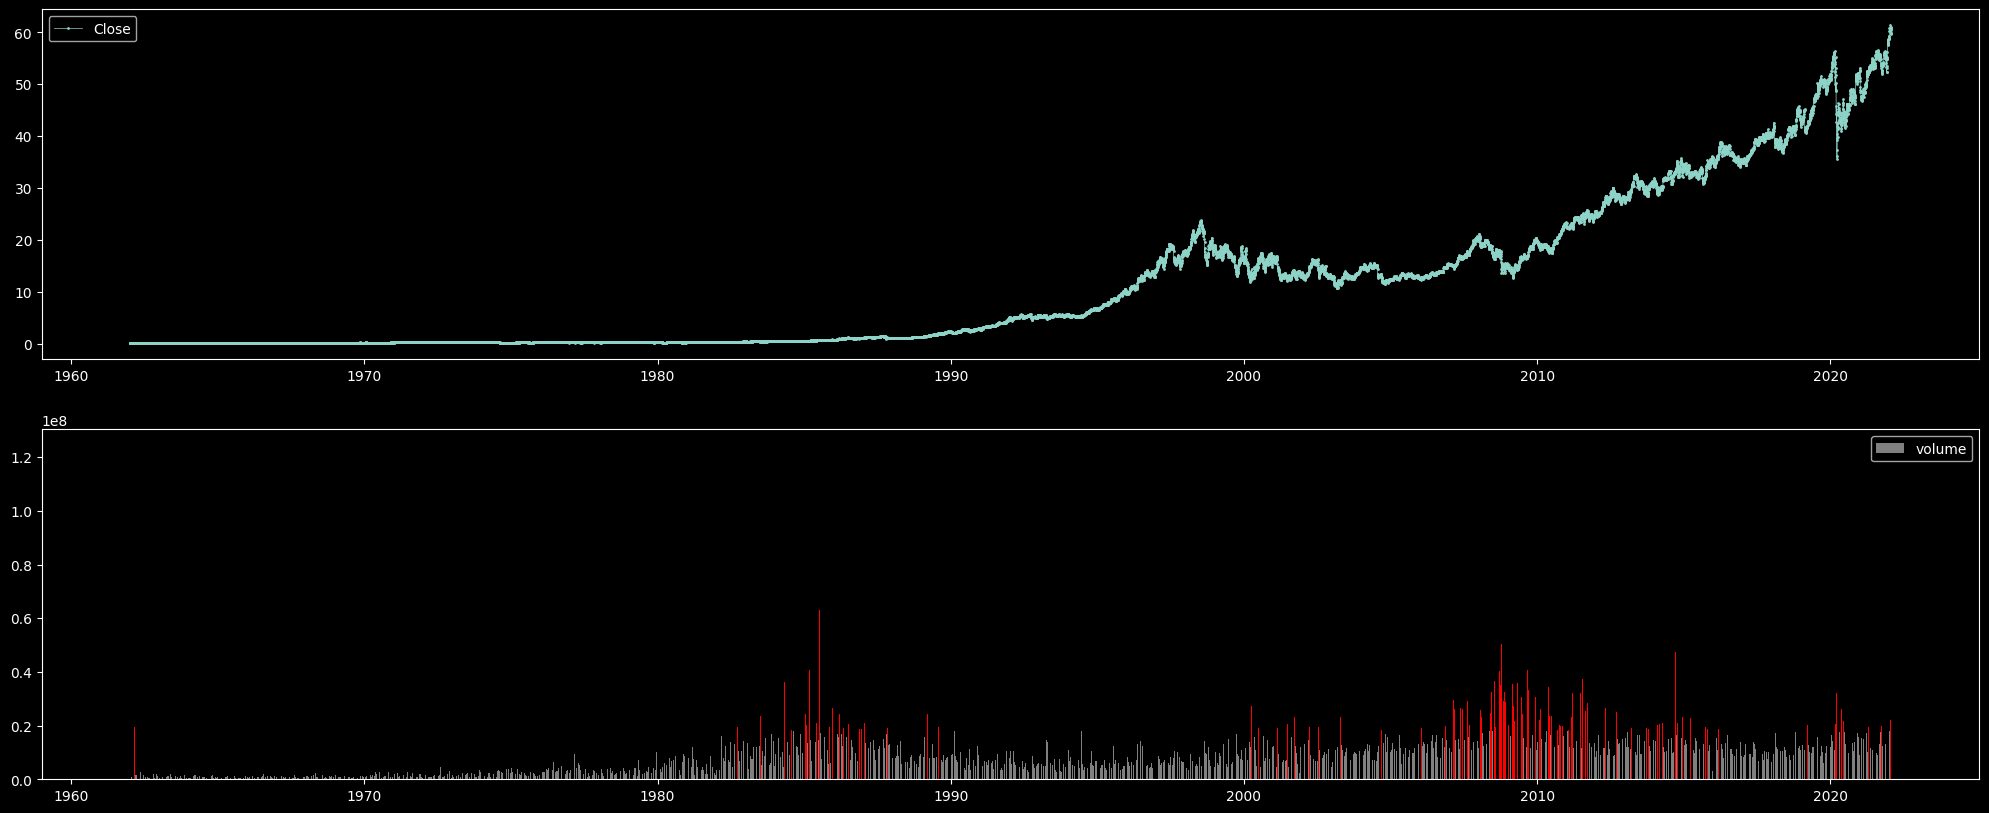

In [ ]:
# ▶ Simultaneous expression of the stock price trend and trading volume issue graph
plt.figure(figsize=(25, 10))

plt.subplot(2,1,1);
plt.plot(df['Date'], df['Close'], 'o-', ms=1, lw=0.5, label='Close');
plt.legend();


plt.subplot(2,1,2);
plt.bar(df['Date'], df['Volume'], label='volume', color=colors);
plt.legend();

### · more than 5%stock price change
---


In [ ]:
# ▶ Create color data to express the stock price fluctuations in the graph
df['rate_color'] = np.where(df['rate_issue']==1, 'red', 'gray')
colors_rate=list(df['rate_color'])
print(colors_rate)

['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', '

In [ ]:
df['rate_color'].value_counts()

,count
rate_color,
gray,14986
red,136


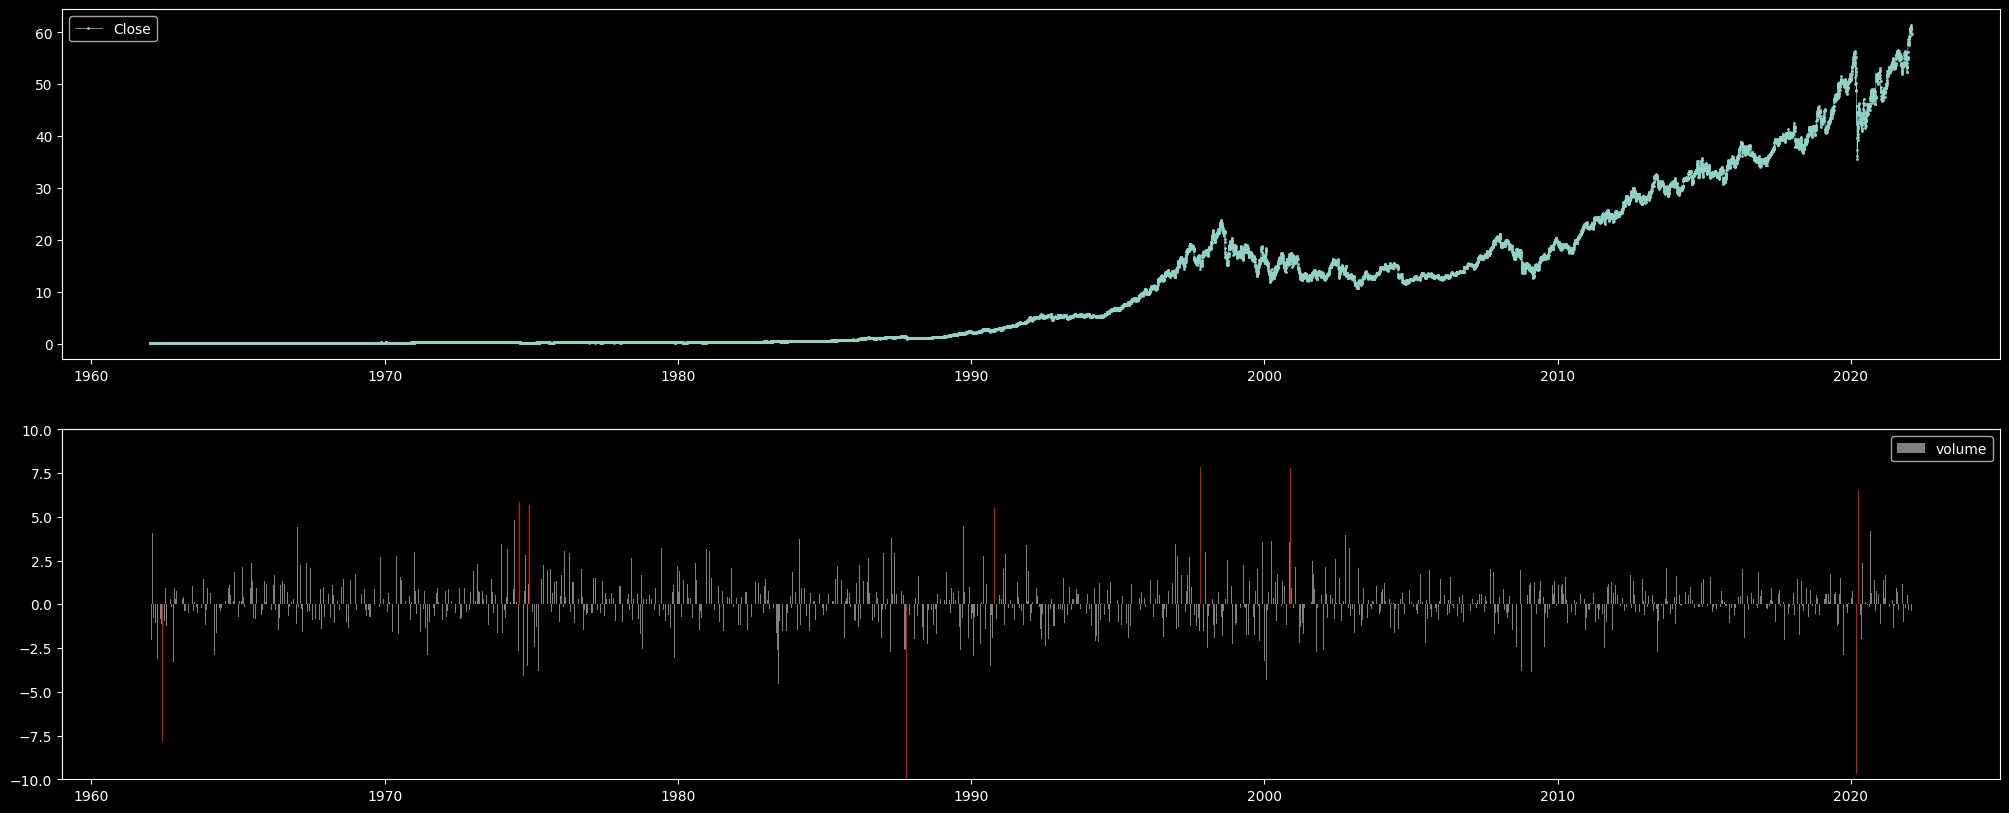

In [ ]:
# ▶ Simultaneous expression of stock price trend and stock price change graph at the same time
plt.figure(figsize=(25, 10))

plt.subplot(2,1,1)
plt.plot(df['Date'], df['Close'], 'o-', ms=1, lw=0.5, label='Close');
plt.legend();

plt.subplot(2,1,2);
plt.bar(df['Date'], df['rate'], label='volume',color=colors_rate);
plt.ylim(-10,10);
plt.legend();

## ** 🥇Session 3 **
** ┗ ML usage stock price prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate,rate_issue,vol_color,rate_color
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013,0,gray,gray
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947,0,gray,gray
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800,0,gray,gray
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0,0,0.050374,-2.261532,0,gray,gray
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0,0,0.049234,-1.028203,0,gray,gray


In [ ]:
# ▶ Removal of COLs that are not required
df.drop(['vol_color', 'rate_color'],axis=1, inplace=True)

In [ ]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate,rate_issue
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013,0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947,0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800,0


In [ ]:
# ▶ Since 5% or more is too small, the target is reduced by 3%
df['rate_issue'] = np.where(df['rate'] > 3, 1, 0)
df['rate_issue'].value_counts()

,count
rate_issue,
0,14727
1,395


In [ ]:
# ▶ 2.6% target rate prediction problem
(395 / (395+14986)) * 100

2.568103504323516

In [ ]:
# ▶ Create target data by applying shift (-1) because it is a problem that predicts a day with a change of more than 3% the next day.
df['target'] =  df['rate_issue'].shift(-1)
df = df.fillna(0)
df[['Date', 'Close', 'rate', 'target']].iloc[1180:1190]

,Date,Close,rate,target
1180,1966-09-07,0.082183,-2.356980,0.0
1181,1966-09-08,0.082750,0.689594,0.0
1182,1966-09-09,0.083292,0.654997,1.0
1183,1966-09-12,0.087856,5.479592,0.0
1184,1966-09-13,0.087285,-0.649300,0.0
1185,1966-09-14,0.087285,0.000000,0.0
1186,1966-09-15,0.087856,0.653543,0.0
1187,1966-09-16,0.086429,-1.623512,0.0
1188,1966-09-19,0.087142,0.825001,0.0
1189,1966-09-20,0.086715,-0.490884,0.0


In [ ]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume_issue,Close_lag,rate,rate_issue,target
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0,0,0.051133,0.000013,0,0.0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0,0,0.051133,-2.227947,0,0.0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0,0,0.049994,0.759800,0,0.0


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Date','target'], axis=1)
Y=df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(10585, 11)
(10585,)
(4537, 11)
(4537,)


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10309
         1.0       1.00      1.00      1.00       276

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.00      1.00     10585

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      4418
         1.0       0.00      0.00      0.00       119

    accuracy                           0.97      4537
   macro avg       0.49      0.50      0.49      4537
weighted avg       0.95      0.97      0.96      4537



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0.0,4536
1.0,1


In [ ]:
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:,1]
y_pred_test_proba = rfc.predict_proba(x_test)[:,1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 1.0
roc_score_test : 0.6759075744376519


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    # FPR: The ratio of not predicting patients who are not cancer patients as cancer patients
    # TPR : Recall
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

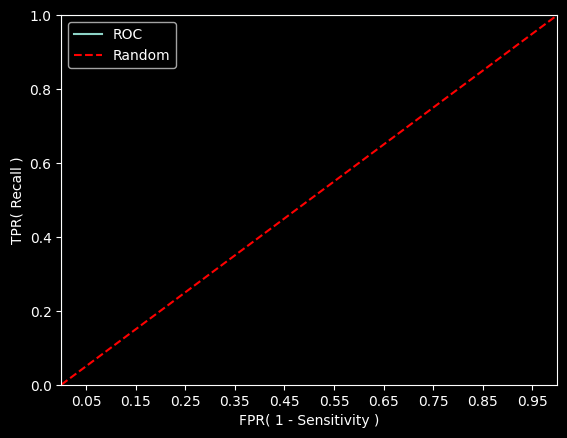

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

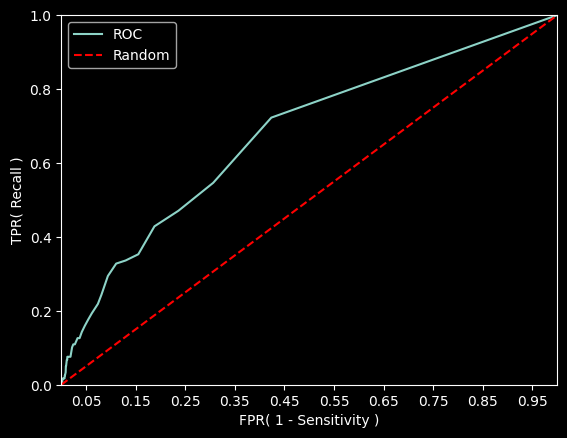

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Hyperparameter tuning
---
* Adjusting options to increase model performance


In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

# ▶ RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 123456, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='recall')
grid_cv.fit(x_train, y_train)

print('best parameter: ', grid_cv.best_params_)
print('best score: {:.4f}'.format(grid_cv.best_score_))

best parameter:  {'max_depth': 12, 'n_estimators': 400}
best score: 0.0109


In [ ]:
# ▶ Best Score standard study
rfc = RandomForestClassifier(n_estimators=400, max_depth=4, random_state = 123456)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     10309
         1.0       1.00      0.00      0.01       276

    accuracy                           0.97     10585
   macro avg       0.99      0.50      0.50     10585
weighted avg       0.97      0.97      0.96     10585

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      4418
         1.0       0.00      0.00      0.00       119

    accuracy                           0.97      4537
   macro avg       0.49      0.50      0.49      4537
weighted avg       0.95      0.97      0.96      4537



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0.0,4537


In [ ]:
# ▶ THRESHOLD adjustment required
y_pred_train = rfc.predict_proba(x_train)
y_pred_train = y_pred_train[:, 1]

for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=0.028:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = rfc.predict_proba(x_test)
y_pred_test = y_pred_test[:, 1]
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=0.028:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91     10309
         1.0       0.08      0.51      0.14       276

    accuracy                           0.83     10585
   macro avg       0.53      0.68      0.52     10585
weighted avg       0.96      0.83      0.89     10585

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      4418
         1.0       0.06      0.34      0.09       119

    accuracy                           0.83      4537
   macro avg       0.52      0.59      0.50      4537
weighted avg       0.96      0.83      0.89      4537



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0.0,3812
1.0,725


In [ ]:
# Suitable problems, the maximum performance of the Train and Test SET prevents overability.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:,1]
y_pred_test_proba = rfc.predict_proba(x_test)[:,1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.7697702584346588
roc_score_test : 0.6891364966086027


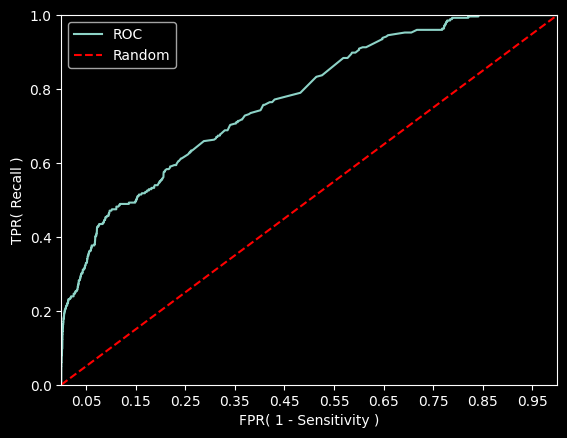

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

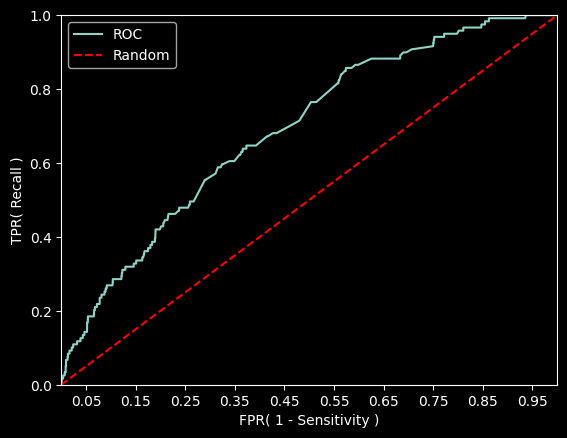

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


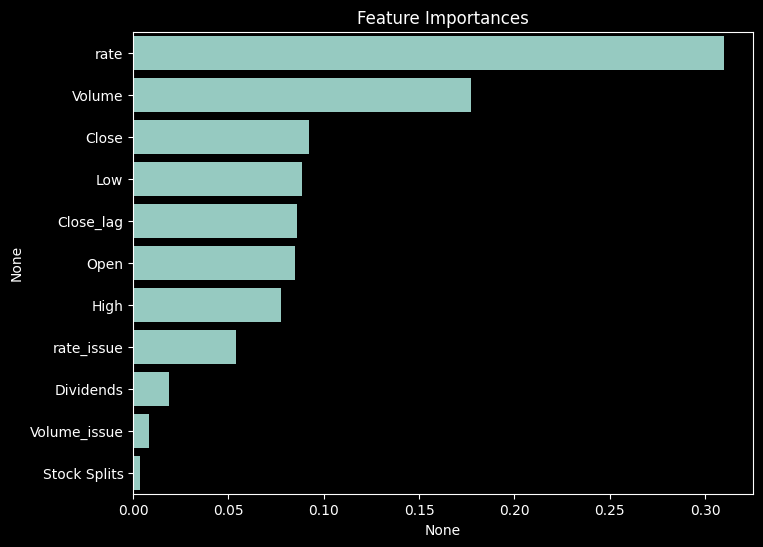

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

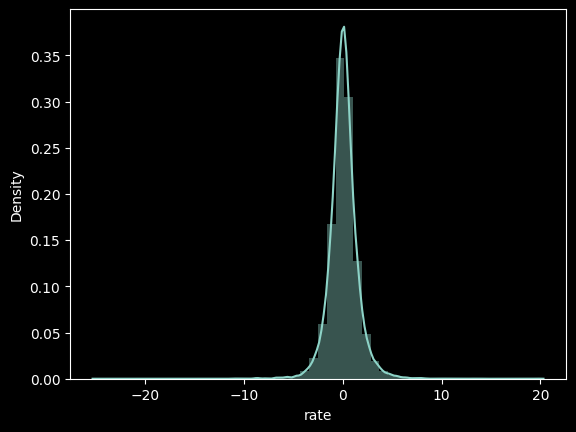

In [ ]:
# ▶ Details for important variables No. 1
sns.distplot(df['rate']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['rate_gp'] = np.where (df['rate'] <= -5, 1,
                           np.where(df['rate'] <= 5, 2, 3))

df[['rate','rate_gp']]

,rate,rate_gp
0,0.000013,2
1,-2.227947,2
2,0.759800,2
3,-2.261532,2
4,-1.028203,2
...,...,...
15117,-0.409836,2
15118,-0.493826,2
15119,-0.810590,2
15120,-0.233488,2


In [ ]:
df.groupby(['rate_gp', 'target'])['rate'].count()

rate_gp  target
1        0.0          44
         1.0          14
2        0.0       14616
         1.0         370
3        0.0          67
         1.0          11
Name: rate, dtype: int64

In [ ]:
# ▶ If the closing price drops by the previous day, there is a higher chance of rising (24%)
print("gp1 :", 14 / (14+44))
print("gp2 :", 370 / (370+14616))
print("gp3 :", 11 / (11+67))

gp1 : 0.2413793103448276
gp2 : 0.024689710396369944
gp3 : 0.14102564102564102


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)